
# **Bike Sharing Systems**
## **Introduction**

Bike-sharing systems provide a convenient and automated way to rent bicycles, with processes like membership, rental, and returns managed through kiosks located throughout a city. The data generated by these systems offers valuable insights into user behaviour. This project focuses on understanding the conversion from casual to registered users by analyzing historical usage data and external factors such as weather conditions. By differentiating between casual and registered users, we aim to forecast conversion trends and bike rental demand for the Capital Bikeshare program in Washington, D.C.


## **Overview**
https://www.kaggle.com/competitions/bike-sharing-demand/overview
The dataset offers hourly rental data spanning two years for the Capital Bikeshare program in Washington, D.C. Through exploratory data analysis and model evaluation, the objective is to identify a suitable model that can accurately forecast bike rental demand for various time frames, such as the next month, week, or day.

Raw Data Field definitions are as below:

    1. datetime: hourly date + timestamp
    2. season: 1 = spring, 2 = summer, 3 = fall, 4 = winter
    3. holiday: whether the day is considered a holiday
    4. workingday: whether the day is neither a weekend nor holiday
    5. weather:
        1: Clear, Few clouds, Partly cloudy, Partly cloudy
        2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
        3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
        4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
    6. temp: temperature in Celsius
    7. atemp: "feels like" temperature in Celsius
    8. humidity: relative humidity
    9. windspeed: wind speed
    10. casual: number of non-registered user rentals initiated
    11. registered: number of registered user rentals initiated
    13. count: number of total rentals

Two sets of data are available- The training dataset and the Testing dataset. Additional test data will be manufactured as needed.

    







In [464]:


!kaggle competitions download -c bike-sharing-demand -p C:/Users/dpamu/kaggle_data


Exception ignored in: <_io.FileIO name=4 mode='wb' closefd=True>
Traceback (most recent call last):
  File "C:\Users\dpamu\miniconda3\envs\test_pdf\lib\site-packages\IPython\utils\_process_win32.py", line 124, in system
    return process_handler(cmd, _system_body)
Exception ignored in: <_io.FileIO name=5 mode='rb' closefd=True>
Traceback (most recent call last):
  File "C:\Users\dpamu\miniconda3\envs\test_pdf\lib\site-packages\IPython\utils\_process_win32.py", line 124, in system
    return process_handler(cmd, _system_body)
Exception ignored in: <_io.FileIO name=6 mode='rb' closefd=True>
Traceback (most recent call last):
  File "C:\Users\dpamu\miniconda3\envs\test_pdf\lib\site-packages\IPython\utils\_process_win32.py", line 124, in system
    return process_handler(cmd, _system_body)


bike-sharing-demand.zip: Skipping, found more recently modified local copy (use --force to force download)


In [11]:
import os

# Check the contents of the kaggle_data directory again
download_path = r'C:\Users\dpamu\kaggle_data'
print("Contents of kaggle_data directory:", os.listdir(download_path))


Contents of kaggle_data directory: ['bike-sharing-demand.zip', 'sampleSubmission.csv', 'test.csv', 'train.csv']


In [12]:
import zipfile

# Define the path to the ZIP file
zip_file_path = os.path.join(download_path, 'bike-sharing-demand.zip')

# Check if the file exists and extract it
if os.path.exists(zip_file_path):
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(download_path)
    print("Extraction completed. Files have been extracted to:", download_path)
else:
    print(f"ZIP file not found at {zip_file_path}.")


Extraction completed. Files have been extracted to: C:\Users\dpamu\kaggle_data


In [13]:
import pandas as pd
import os

extracted_path = r'C:\Users\dpamu\kaggle_data'
extracted_files = os.listdir(extracted_path)
train_file_path = os.path.join(extracted_path, 'train.csv')
test_file_path = os.path.join(extracted_path, 'test.csv')

df_train = pd.read_csv(train_file_path)
df_test = pd.read_csv(test_file_path)

display(df_train.head(5)) 
display(df_test.head(5)) 



,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


### Using KNN Imputation technique to populate the missing values on the combined training and test files

In [14]:
import pandas as pd
from sklearn.impute import KNNImputer

# Combine the datasets, and then apply KNN imputation
df_combined = pd.concat([df_train, df_test], ignore_index=True)

# Drop the 'datetime' column for imputation, as KNNImputer works on numerical data
df_combined_no_datetime = df_combined.drop(columns=['datetime'])

# Define columns to apply imputation ('casual', 'registered', 'count')
columns_to_impute = ['casual', 'registered', 'count']

# Separate columns to impute and the rest of the columns
df_to_impute = df_combined_no_datetime[columns_to_impute]
df_not_to_impute = df_combined_no_datetime.drop(columns=columns_to_impute)

# Apply KNN Imputation for 'casual', 'registered', and 'count'
imputer = KNNImputer(n_neighbors=5)
df_imputed = imputer.fit_transform(df_to_impute)

# Convert the imputed result back to a DataFrame with the column names of imputed columns
df_imputed = pd.DataFrame(df_imputed, columns=columns_to_impute)

# Combine the imputed columns with the non-imputed columns
df_combined_imputed = pd.concat([df_not_to_impute, df_imputed], axis=1)

# Reattach the 'datetime' column to the imputed DataFrame
df_combined_imputed['datetime'] = df_combined['datetime']

# Re-arrange the 'datetime' column to be the first column
df_combined_imputed = df_combined_imputed[['datetime'] + df_not_to_impute.columns.tolist() + columns_to_impute]

# Display the updated DataFrame with all features
df_combined_imputed.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1.0


# Exlporatory Data Analysis (EDA)
#### Exploratory Data Analysis (EDA) offers a comprehensive understanding of the data, its structure, and the relationships between variables. Missing data can skew these relationships, resulting in inaccurate outcomes, while highly correlated features may introduce redundancy and instability, ultimately reducing model performance. EDA is essential for identifying data assumptions before modelling, helping ensure that the most suitable model is selected for the task.
#### Through various checks and analyses,  deeper insights into the data are captured.

In [15]:

# Exploring at data type specifics
df_combined_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    17379 non-null  object 
 1   season      17379 non-null  int64  
 2   holiday     17379 non-null  int64  
 3   workingday  17379 non-null  int64  
 4   weather     17379 non-null  int64  
 5   temp        17379 non-null  float64
 6   atemp       17379 non-null  float64
 7   humidity    17379 non-null  int64  
 8   windspeed   17379 non-null  float64
 9   casual      17379 non-null  float64
 10  registered  17379 non-null  float64
 11  count       17379 non-null  float64
dtypes: float64(6), int64(5), object(1)
memory usage: 1.6+ MB


In [16]:
#check for null data
import numpy as np
df_combined_imputed.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [17]:
nan_check = df_combined_imputed.isna().any().any()
print(nan_check)


False


In [596]:
correlation_matrix_raw = df_combined_imputed.corr(numeric_only=True)

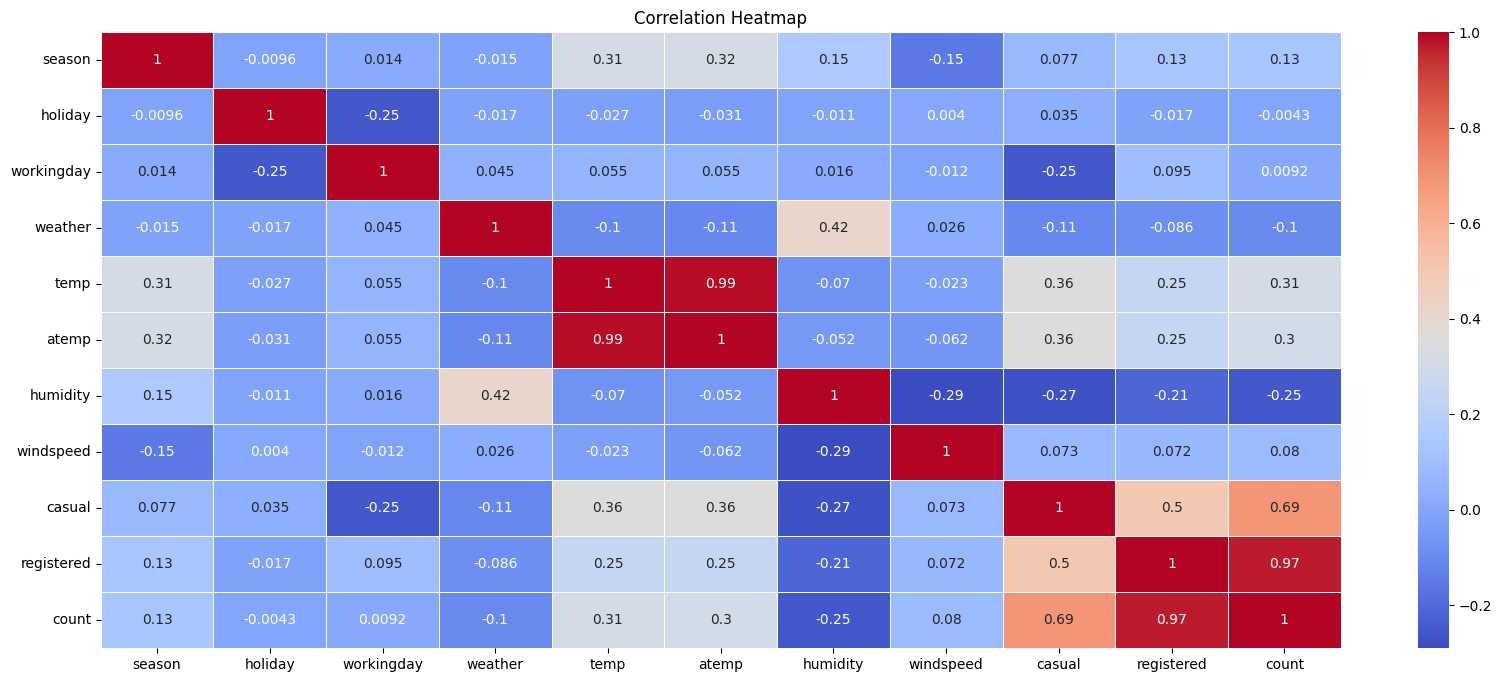

In [597]:
plt.figure(figsize=(20,8))
sns.heatmap(correlation_matrix_raw, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

Inference:

season, holiday,workingday,weather are the categorical features.

temparature,atemp,humidity,windspeed,casual,registered are the numerical features.

The dependent feature is count (prediction variable in a model i.e ,y)

In [550]:
train_df=df_combined_imputed

# Feature Engineering
#### Feature engineering enhances a model’s ability to capture complex patterns and relationships within the data. By incorporating factors such as temporal patterns, weather impacts, and seasonal trends, feature engineering adds significant value to the business objective of capturing the casual users' market. Additionally, it helps reduce multicollinearity, improving both the model's performance and the interpretation of data within a business context.

In [607]:

import numpy as np
import pandas as pd

# Adding date and time columns and removing datetime for better analysis
train_df['datetime'] = pd.to_datetime(train_df['datetime'])

#Changing the metrics from Celcius to Fahrenheit for ease of understanding. Data is rounded to the nearest degree Fahrenheit
train_df['temp_f'] = ((train_df['temp'] * 9/5) + 32).round(0)
train_df['atemp_f'] = ((train_df['atemp'] * 9/5) + 32).round(0)

#Windspeed rounded to nearest integer value
train_df['windspeed_r'] = (train_df['windspeed'] ).round(0)


# Extract date, year,month,day of the month, day of the week, and time separately for more granularity
train_df['date'] = train_df['datetime'].dt.date
train_df['time'] = train_df['datetime'].dt.time
train_df["hour"] = train_df["datetime"].dt.hour
train_df["day_of_week"] = train_df["datetime"].dt.dayofweek
train_df["month"] = train_df["datetime"].dt.month
train_df["year"] = train_df["datetime"].dt.year
train_df["day_of_month"] = train_df["datetime"].dt.day
train_df['sin_hour'] = np.sin(2 * np.pi * train_df['hour'] / 24)
train_df['cos_hour'] = np.cos(2 * np.pi * train_df['hour'] / 24)
train_df['sin_month'] = np.sin(2 * np.pi * train_df['month'] / 12)
train_df['cos_month'] = np.cos(2 * np.pi * train_df['month'] / 12)
train_df['sin_season'] = np.sin(2 * np.pi * train_df['season'] / 4)
train_df['cos_season'] = np.cos(2 * np.pi * train_df['season'] / 4)
train_df['sin_day_of_week'] = np.sin(2 * np.pi * train_df['day_of_week'] / 7)
train_df['cos_day_of_week'] = np.cos(2 * np.pi * train_df['day_of_week'] / 7)
period = [1,2,3,4]
brkdown = [
    (train_df['hour'] < 12),
    (train_df['hour'] >= 12) & (train_df['hour'] < 17),
    (train_df['hour'] >= 17) & (train_df['hour'] < 20),
    (train_df['hour'] >= 20)
]
train_df['period_of_day'] = np.select(brkdown, period, default=0)

#Marking Weekend
weekend = ['0', '1']
wkend_brkdown=brkdown = [
    (train_df['day_of_week'] < 5),
    (train_df['day_of_week'] >= 5) 
]
train_df['weekend'] =  np.where( (train_df['day_of_week'] >=5),1, 0)


#Marking Holiday Weekend
holi_weekend = ['1', '0']
holi_brkdown=brkdown = [
    (train_df['day_of_week'] >= 5) & (train_df['holiday']==1),
    (train_df['day_of_week'] >= 5) & (train_df['holiday']==0) 
]
train_df['holiday_weekend'] = np.where( (train_df['holiday'] == 1) & (train_df['weekend'] == 1) | 
                                       ((train_df['holiday'] == 1) & ((train_df['day_of_week'] == 4) | (train_df['day_of_week'] == 0))), 
                                       1, 0)
#Adding interaction elements
train_df['dew_point'] = train_df['temp'] - ((100 - train_df['humidity']) / 5.0)
train_df['windchill'] = (35.74 + 0.6215 * train_df['temp_f'] - 35.75 * (train_df['windspeed_r']**0.16) + 0.4275 * train_df['temp_f'] * (train_df['windspeed_r']**0.16)).round(0)


train_df.loc[:, 'weekend'] = pd.to_numeric(train_df['weekend'], errors='coerce').fillna(0).astype(int)
def calculate_holiday_proximity(current_date, holidays):
    # Ensure current_date is valid and not NaT
    if pd.isnull(current_date):
        return None  # Return None if current_date is NaT
    current_date = current_date.date()  # Extract the date part
    # Calculate the difference (in days) between the given date and all holidays, take the minimum
    return min(abs((current_date - holiday).days) for holiday in holidays)

# Apply the function to calculate proximity to holidays for each row
train_df['holiday_proximity'] = train_df['datetime'].apply(lambda x: calculate_holiday_proximity(x, holidays))


train_df['registered_trend'] = train_df['registered'].rolling(window=30).mean().fillna(0)  # 30-day rolling average
train_df['casual_trend'] = train_df['casual'].rolling(window=30).mean().fillna(0)

tst=train_df.dropna(subset=['casual_trend', 'registered_trend'])

#
#Apply log transformation (log(1 + casual)) to handle zeros
train_df['log_casual'] = np.log1p(train_df['casual'])
# Apply log transformation (log(1 + registered)) to handle zeros
train_df['log_registered'] = np.log1p(train_df['registered'])

# Create the lag feature 'lag_casual_1', which is the 'casual' value from the previous row
train_df['lag_casual'] = train_df['casual'].shift(1).fillna(0)

train_df['quarter'] = train_df['datetime'].dt.quarter

# Create the lag feature 'lag_registered_1', which is the 'registered' value from the previous row
train_df['lag_registered'] = train_df['registered'].shift(1).fillna(0)

## Calculate the conversion ratio (Registered Riders / (Casual Riders + 1))
train_df['conversion_ratio'] =np.log1p((train_df['log_registered']) / (train_df['log_casual'] + 1)) 


train_final_df=train_df[['season','holiday', 'workingday','weather', 'temp_f','humidity','windspeed_r',
                         'hour','day_of_week','day_of_month',
                         'sin_day_of_week','cos_day_of_week','sin_month','cos_month','sin_hour','cos_hour',
                         'period_of_day','weekend','holiday_proximity','sin_season','cos_season','month',
                        'casual','registered','count','lag_casual','lag_registered','log_casual','log_registered',
                         'conversion_ratio']]


In [608]:

train_final_df.describe()


,season,holiday,workingday,weather,temp_f,humidity,windspeed_r,hour,day_of_week,day_of_month,...,cos_season,month,casual,registered,count,lag_casual,lag_registered,log_casual,log_registered,conversion_ratio
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,1.737900e+04,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.028770,0.682721,1.425283,68.709017,62.722884,12.736233,11.546752,3.011451,15.683411,...,-1.018471e-02,6.537775,36.021955,155.552177,191.574132,36.019882,155.543227,3.048343,4.641467,0.784892
std,1.106918,0.167165,0.465431,0.639357,14.214074,19.292983,8.196891,6.914405,2.001966,8.789373,...,7.050774e-01,3.438776,39.540385,119.537321,143.363753,39.541329,119.543144,1.257675,1.152306,0.154574
min,1.000000,0.000000,0.000000,1.000000,33.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,-1.000000e+00,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,57.000000,48.000000,7.000000,6.000000,1.000000,8.000000,...,-1.000000e+00,4.000000,10.000000,85.000000,101.000000,10.000000,85.000000,2.397895,4.454347,0.739933
50%,3.000000,0.000000,1.000000,1.000000,69.000000,63.000000,13.000000,12.000000,3.000000,16.000000,...,-1.836970e-16,7.000000,36.021955,155.552177,191.574132,36.021955,155.552177,3.611511,5.053389,0.739945
75%,3.000000,0.000000,1.000000,2.000000,81.000000,78.000000,17.000000,18.000000,5.000000,23.000000,...,6.123234e-17,10.000000,36.021955,155.552177,192.000000,36.021955,155.552177,3.611511,5.053389,0.807298
max,4.000000,1.000000,1.000000,4.000000,106.000000,100.000000,57.000000,23.000000,6.000000,31.000000,...,1.000000e+00,12.000000,367.000000,886.000000,977.000000,367.000000,886.000000,5.908083,6.787845,1.903168


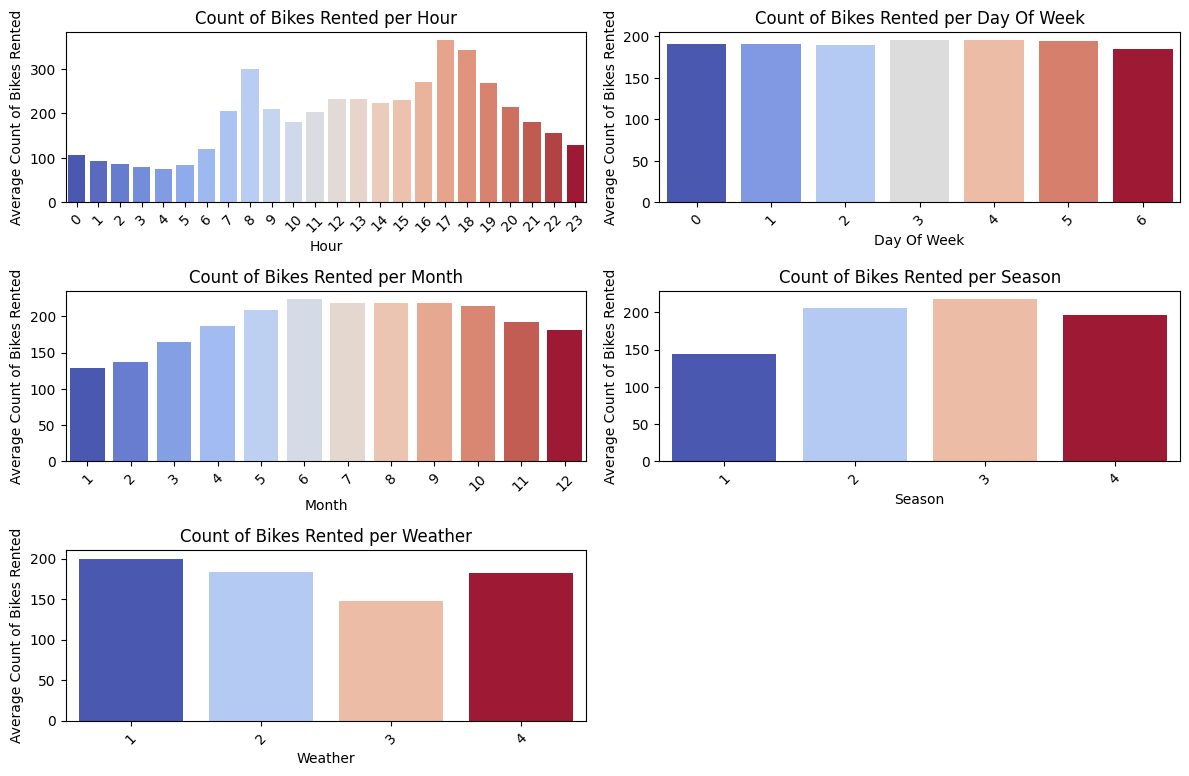

In [561]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_bike_counts(feature: str):
    # Create the bar plot without initializing a new figure
    sns.barplot(
        x=feature, 
        y='count', 
        data=train_final_df.groupby(feature)['count'].mean().reset_index(), 
        hue=feature, 
        palette='coolwarm', 
        legend=False
    )
    # Formatting the title
    title_feature = feature.replace('_', ' ').title()
    plt.title(f'Count of Bikes Rented per {title_feature}')
    plt.xlabel(title_feature)
    plt.ylabel('Average Count of Bikes Rented')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Main plotting logic
plt.figure(figsize=(12, 10))

# First subplot
plt.subplot(4, 2, 1)
plot_bike_counts('hour')

# Second subplot
plt.subplot(4, 2, 2)
plot_bike_counts('day_of_week')


# Third subplot
plt.subplot(4, 2, 3)
plot_bike_counts('month')


# Fourth subplot
plt.subplot(4, 2, 4)
plot_bike_counts('season')

# Fifth subplot
plt.subplot(4, 2, 5)
plot_bike_counts('weather')
     

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


Inferences-:
    1. The "Hour" bar plot indicates a significantly higher demand for bikes during peak hours, specifically at 8 AM and between 5 PM and 6 PM in the evening
    2. In the "Day of the Week" bar plot there isnt much variation in the usage
    3. In the "Month" bar plot months May through October has the  most rentals
    4. As with the  monthly plot,Season  bar plot shows same Spring, Summer having higher rentals
    5. In the "Weather" bar plot we can say maximum rental usage is whenthe  weather is Clear, Few clouds, Partly cloudy, Partly cloudy and Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

In [562]:
train_final_df.head(5)

,season,holiday,workingday,weather,temp_f,humidity,windspeed_r,hour,day_of_week,day_of_month,...,cos_season,month,casual,registered,count,lag_casual,lag_registered,log_casual,log_registered,conversion_ratio
0,1,0,0,1,50.0,81,0.0,0,5,1,...,6.123234e-17,1,3.0,13.0,16.0,NaN,NaN,1.386294,2.639057,1.446919
1,1,0,0,1,48.0,80,0.0,1,5,1,...,6.123234e-17,1,8.0,32.0,40.0,3.0,13.0,2.197225,3.496508,1.516347
2,1,0,0,1,48.0,80,0.0,2,5,1,...,6.123234e-17,1,5.0,27.0,32.0,8.0,32.0,1.791759,3.332205,1.704748
3,1,0,0,1,50.0,75,0.0,3,5,1,...,6.123234e-17,1,3.0,10.0,13.0,5.0,27.0,1.386294,2.397895,1.252763
4,1,0,0,1,50.0,75,0.0,4,5,1,...,6.123234e-17,1,0.0,1.0,1.0,3.0,10.0,0.000000,0.693147,0.693147


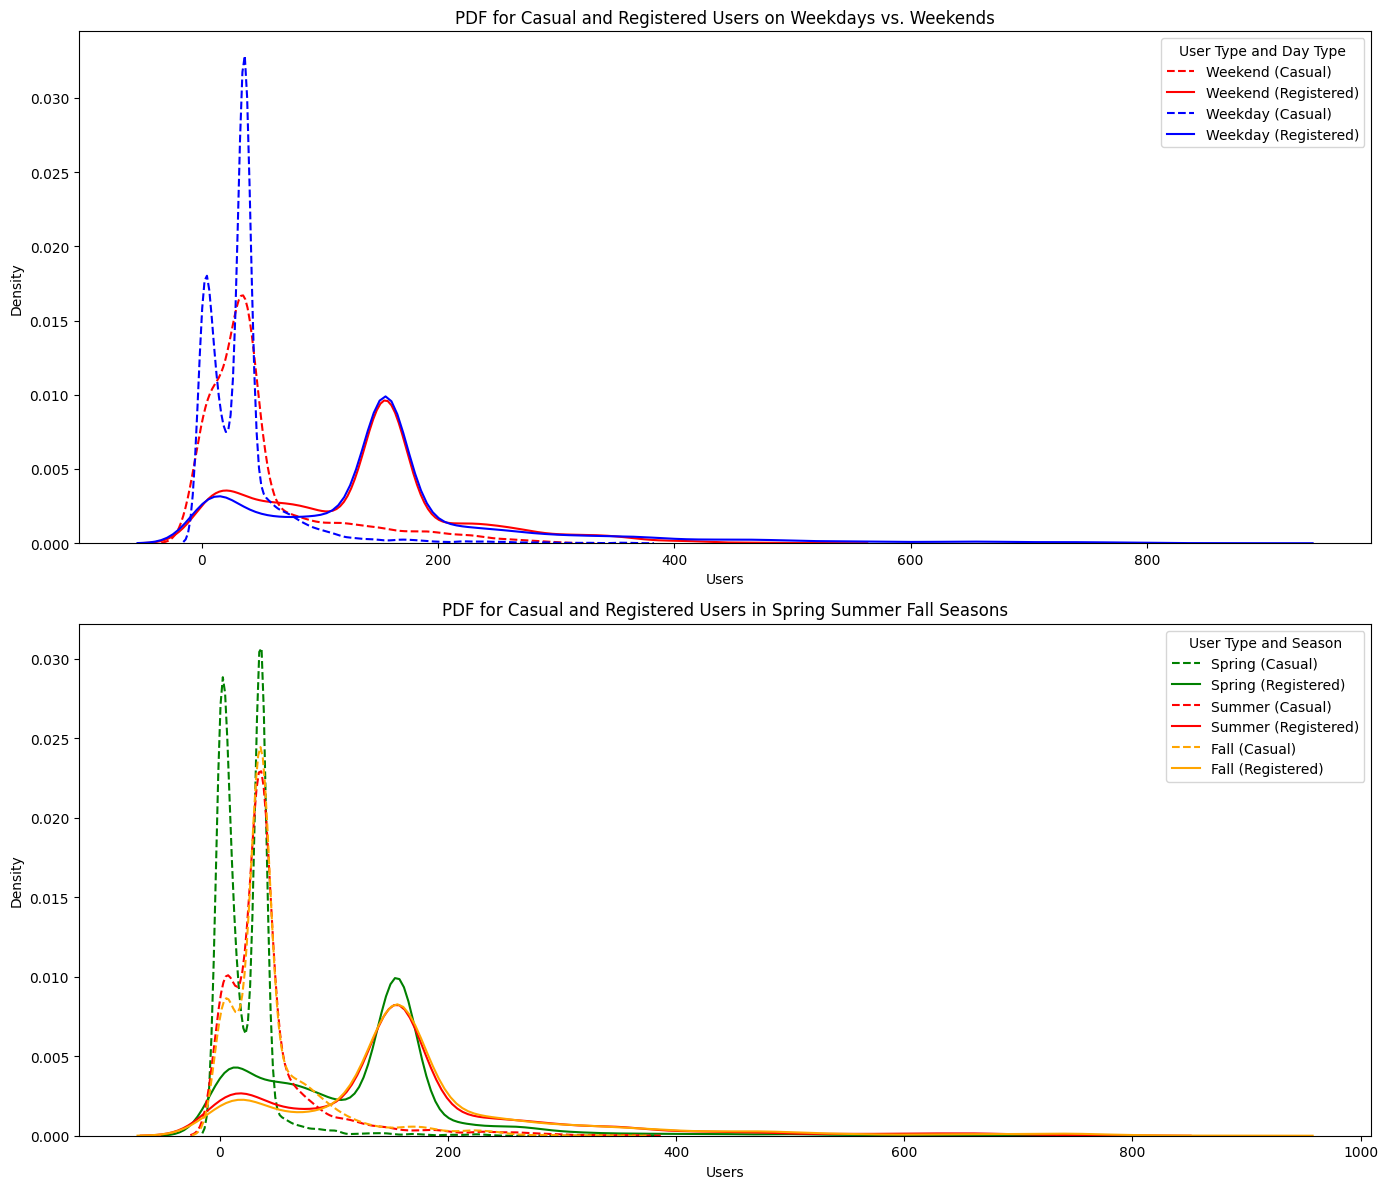

In [563]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.figure(figsize=(14, 12))

# Subplot 1: PDF for Casual and Registered Users on Weekdays vs. Weekends
plt.subplot(2, 1, 1)
sns.kdeplot(data=train_final_df[train_final_df['day_of_week'] > 5], x='casual', color='red', label='Weekend (Casual)', linestyle='--')
sns.kdeplot(data=train_final_df[train_final_df['day_of_week'] > 5], x='registered', color='red', label='Weekend (Registered)')
sns.kdeplot(data=train_final_df[train_final_df['day_of_week'] <= 5], x='casual', color='blue', label='Weekday (Casual)', linestyle='--')
sns.kdeplot(data=train_final_df[train_final_df['day_of_week'] <=5], x='registered', color='blue', label='Weekday (Registered)')

# Adding plot details for the first plot
plt.title('PDF for Casual and Registered Users on Weekdays vs. Weekends')
plt.xlabel('Users')
plt.ylabel('Density')
plt.legend(title='User Type and Day Type', loc='upper right', frameon=True)

# Subplot 2: PDF for Casual and Registered Users in Different Seasons
plt.subplot(2, 1, 2)
sns.kdeplot(data=train_final_df[train_final_df['season'] == 1], x='casual', color='green', label='Spring (Casual)', linestyle='--')
sns.kdeplot(data=train_final_df[train_final_df['season'] == 1], x='registered', color='green', label='Spring (Registered)')
sns.kdeplot(data=train_final_df[train_final_df['season'] == 2], x='casual', color='red', label='Summer (Casual)', linestyle='--')
sns.kdeplot(data=train_final_df[train_final_df['season'] == 2], x='registered', color='red', label='Summer (Registered)')
sns.kdeplot(data=train_final_df[train_final_df['season'] == 3], x='casual', color='orange', label='Fall (Casual)', linestyle='--')
sns.kdeplot(data=train_final_df[train_final_df['season'] == 3], x='registered', color='orange', label='Fall (Registered)')


# Adding plot details for the second plot
plt.title('PDF for Casual and Registered Users in Spring Summer Fall Seasons')
plt.xlabel('Users')
plt.ylabel('Density')
plt.legend(title='User Type and Season', loc='upper right', frameon=True)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


#season: 1 = spring, 2 = summer, 3 = fall, 4 = winter


1. From the KDE plot for Causal and Registered Weekend vs Weekday, Causal users tend to  rent bikes more  on weekdays than on weekends unlike the registered users who rent more on weekends than on weekdays.

2. From the KDE plot for Causal and Registered Weekend vs Weekday, Causal users tend to rent bikes the most in Spring followed by summer and fall
The registers too have the same trend Spring->Summer->Fall

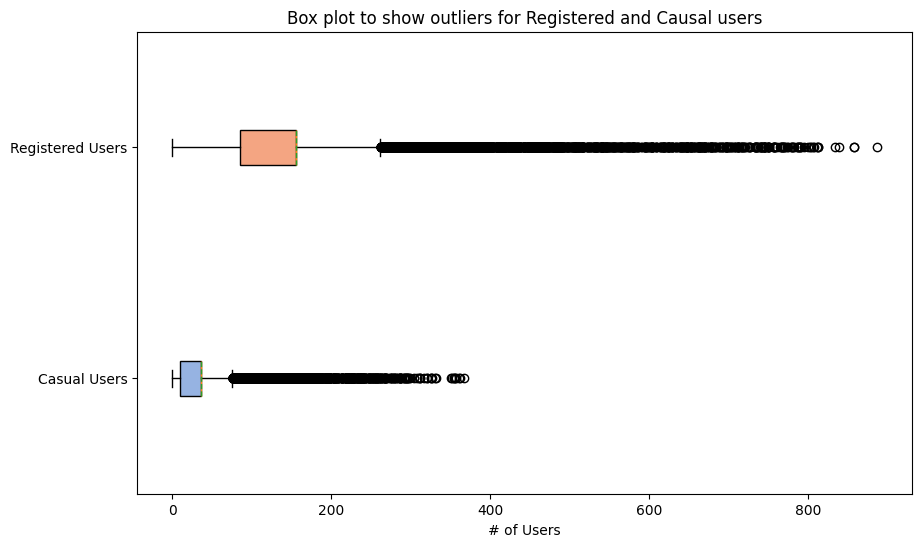

In [564]:

users_causaul_registered = [train_final_df['casual'], train_final_df['registered']]
colors = ['#96B3E2', '#F4A582']

plt.figure(figsize=(10, 6))

box = plt.boxplot(users_causaul_registered, vert=False, showmeans=True, meanline=True, patch_artist=True)
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
# add labels in y axis
plt.yticks([1, 2], ['Casual Users', 'Registered Users'])

plt.title('Box plot to show outliers for Registered and Causal users')
plt.xlabel("# of Users")          
plt.show()





Box plots for Registered and Casual users show many bike riders outside of typical usage(outliers), causing it to skew to the right.
Mean line shown in the dotted green line is higher than the median proving the skewness to the right. There is a good amount of overdispersion so the outliers cant be deleted or ignored.

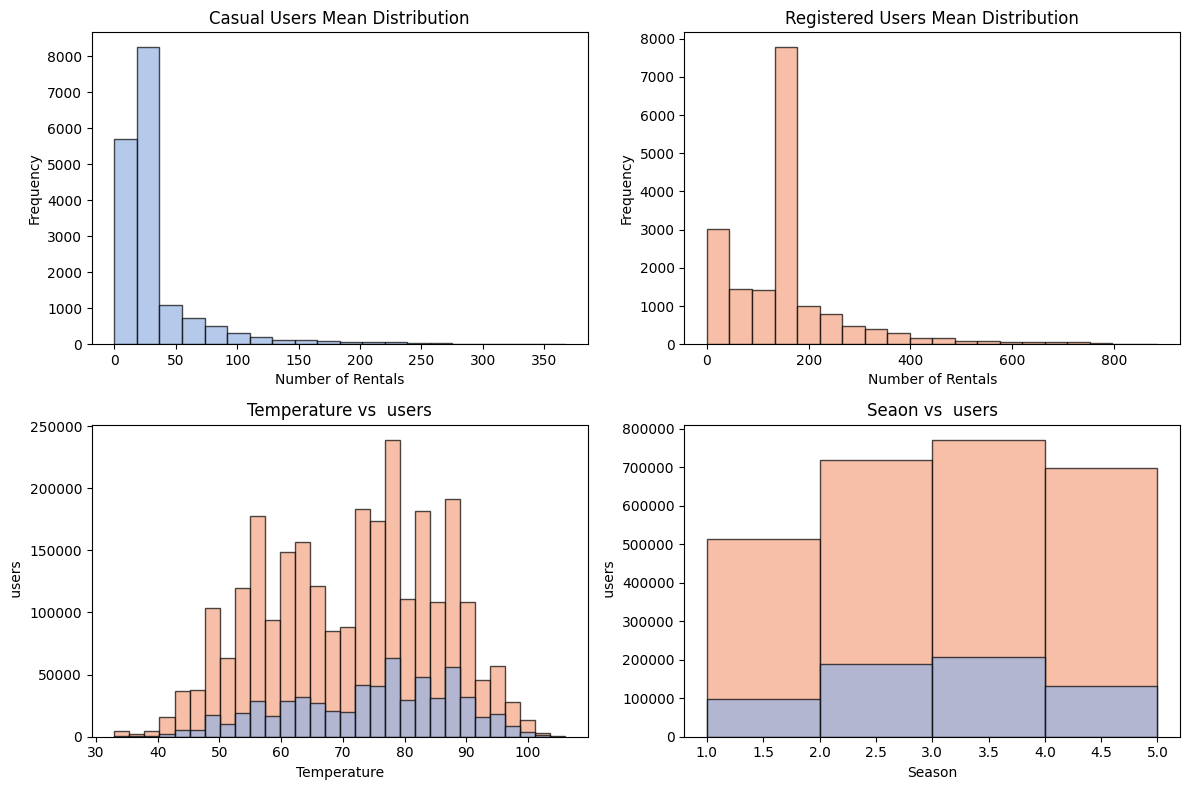

In [565]:
import matplotlib.pyplot as plt

# Plotting histograms for 'casual' and 'registered' users to compare their distributions
plt.figure(figsize=(12, 8))

# Histogram for 'casual' users
plt.subplot(2, 2, 1)
plt.hist(train_final_df['casual'], bins=20, alpha=0.7, color='#96B3E2', edgecolor='black')
plt.title('Casual Users Mean Distribution')
plt.xlabel('Number of Rentals')
plt.ylabel('Frequency')

# Histogram for 'registered' users
plt.subplot(2, 2, 2)
plt.hist(train_final_df['registered'], bins=20, alpha=0.7, color='#F4A582', edgecolor='black')
plt.title('Registered Users Mean Distribution')
plt.xlabel('Number of Rentals')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
plt.hist(train_final_df['temp_f'], bins=30, weights=train_final_df['registered'], color='#F4A582', edgecolor='black', alpha=0.7)
plt.hist(train_final_df['temp_f'], bins=30, weights=train_final_df['casual'], color='#96B3E2', edgecolor='black', alpha=0.7)
#generate plot
plt.title("Temperature vs  users")
plt.xlabel("Temperature")
plt.ylabel(" users")

plt.subplot(2, 2, 4)
plt.hist(train_final_df['season'], bins=[1, 2, 3, 4,5], weights=train_final_df['registered'], color='#F4A582', edgecolor='black', alpha=0.7)
plt.hist(train_final_df['season'], bins=[1, 2, 3, 4,5], weights=train_final_df['casual'], color='#96B3E2', edgecolor='black', alpha=0.7)

#generate plot
plt.title("Seaon vs  users")
plt.xlabel("Season")
plt.ylabel(" users")

plt.tight_layout()
plt.show()

    1. From Causual and Registered users distributions we can say that it is right skewed distribution. Frequency distribution of
        of Casual users is higher compared to Registered users but then it drops down much lesser value than Registered user
    2. From the Tempearaturev vs users histogram shows that there are 2 peaks -i) maximum number bike riders rent when temperature is between 70 F-90 F
        ii) second peak is between 55F-65F
    3. The season vs users histograms shows that peak usage for 2 years happens to be in Fall with surprisingly summer and winter rental ussage being same and spring being  the least overall
        

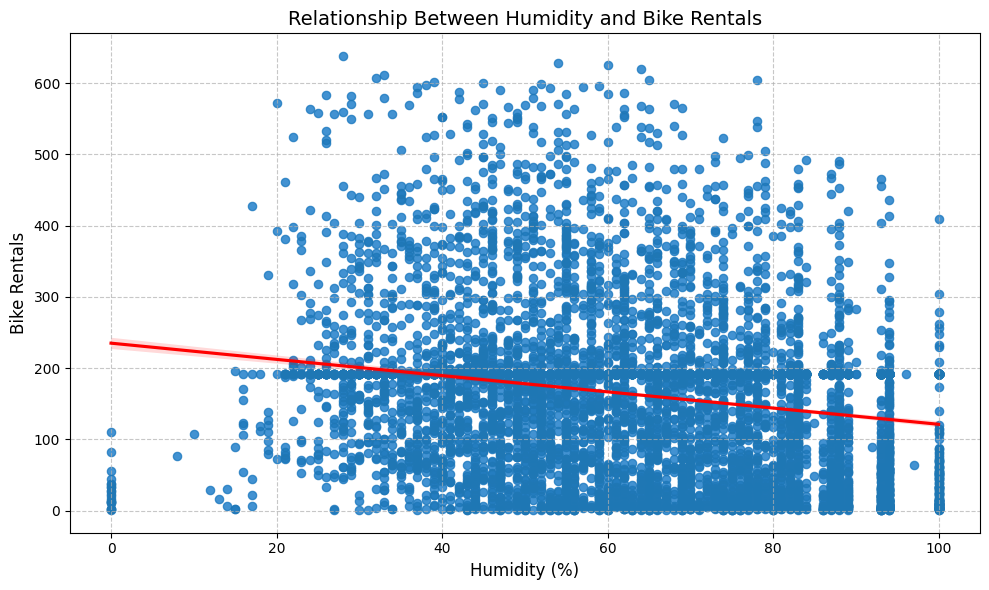

In [612]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data for May 2012
may_2012_data = train_df[(train_df['year'] == 2011) ]

# Set up the plot
plt.figure(figsize=(10, 6))

# Create the scatter plot using Seaborn for better styling
sns.scatterplot(x=may_2012_data['humidity'], 
                y=may_2012_data['count'],   # Corrected this line to use the filtered data
                alpha=0.6, 
                color='dodgerblue', 
                edgecolor=None)
sns.regplot(x=may_2012_data['humidity'], 
            y=may_2012_data['count'], 
            scatter_kws={'alpha': 0.6}, 
            line_kws={"color": "red"})

# Add titles and labels
plt.title('Relationship Between Humidity and Bike Rentals', fontsize=14)
plt.xlabel('Humidity (%)', fontsize=12)
plt.ylabel('Bike Rentals', fontsize=12)

# Display gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


In [609]:
correlation_matrix = train_final_df.corr()

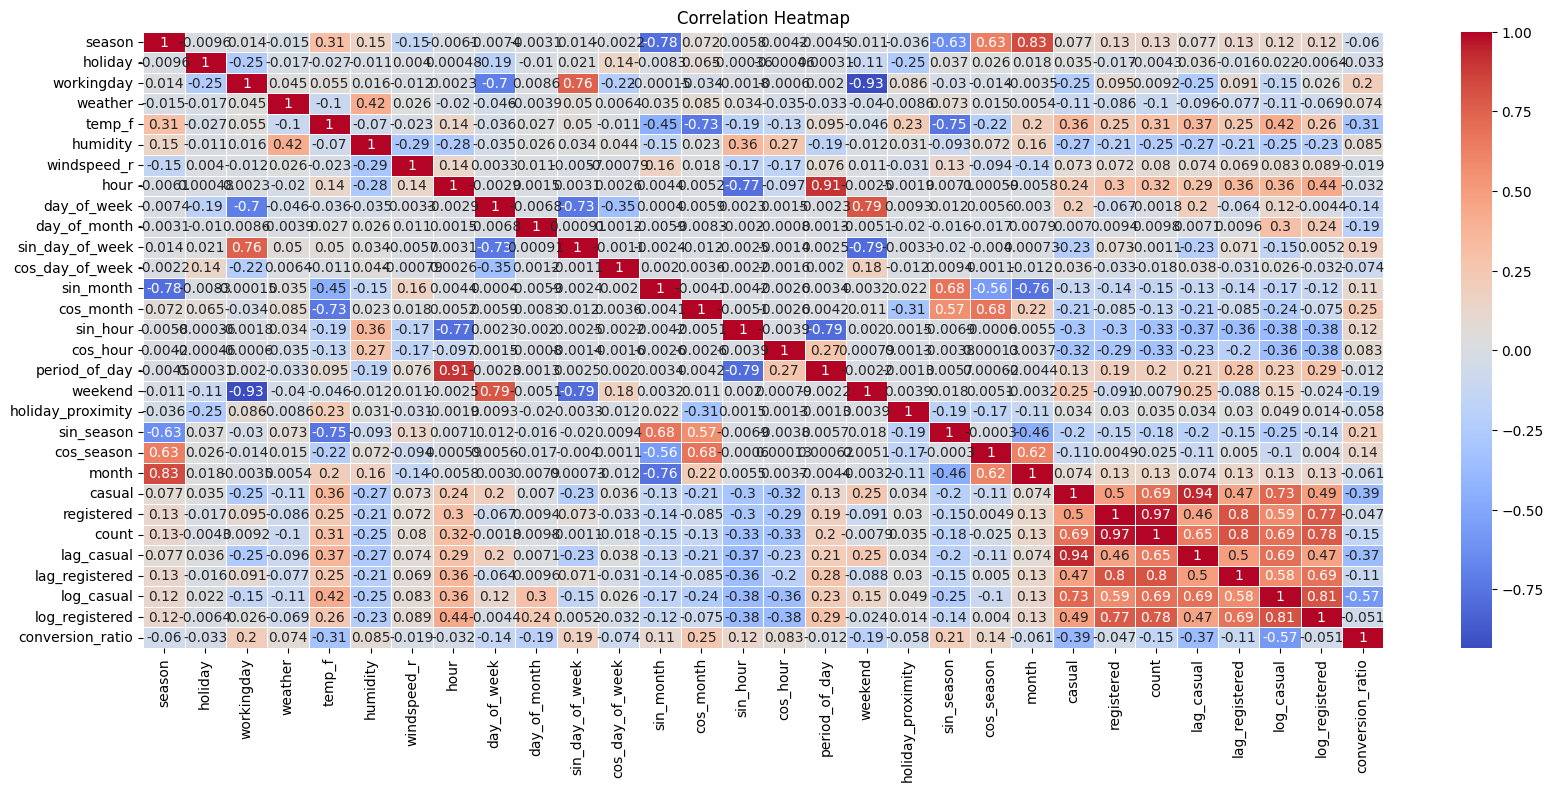

In [610]:
plt.figure(figsize=(20,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

Performing a correlation test provides information on the relationships between features. Features that are highly correlated may be redundant and can be eliminated, as they do not contribute additional information for prediction. Retaining only uncorrelated features helps reduce the number of dimensions, improving model efficiency.

In the above heatmap(correlation matrix) the most correlated features are temp and atemp, season and month, registered and count- This could mean that the independent variable(registered) contains useful information that helps predict the dependent variable(count). However, correlation alone doesn't guarantee that the variable will improve the predictive performance of the model.

In [611]:
# List columns with NaN values
nan_columns = train_final_df.columns[train_final_df.isna().any()].tolist()
print(nan_columns)


[]


In [10]:

train_final_df = train_final_df.drop('cos_season', axis=1) 
train_final_df = train_final_df.drop('sin_season', axis=1) 
train_final_df = train_final_df.drop('month', axis=1) 
train_final_df = train_final_df.drop('period_of_day', axis=1) 

NameError: name 'train_final_df' is not defined

In [614]:

train_final_df = train_final_df.drop('casual', axis=1) 
train_final_df = train_final_df.drop('registered', axis=1) 


## Principal Component Analysis (PCA)
### PCA is used to reduce noise and extract when dealing with large datasets that have highly correlated features. This technique would preserve the variances and produced a simpler set of uncorrelated data.

In [615]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Assuming df is your DataFrame
# Drop the target variable and any columns you don't want to include in PCA
X = train_final_df.drop(['conversion_ratio'], axis=1)  # Input features
y = train_final_df['conversion_ratio']  # Target

# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Standardize the data (fit on X_train and transform both X_train and X_test)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Apply PCA (fit on X_train_scaled and transform both X_train_scaled and X_test_scaled)
pca = PCA(n_components=24)  # Retain 10 principal components (adjust as needed)
X_train_pca = pca.fit_transform(X_train_scaled)  # Fit and transform on training data
X_test_pca = pca.transform(X_test_scaled)        # Transform test data using the same PCA

# Now, X_train_pca and X_test_pca are your reduced feature sets for modeling

In [616]:
print(f"Number of samples in X_train: {len(X_train)}")
print(f"Number of samples in y_train: {len(y_train)}")

Number of samples in X_train: 13903
Number of samples in y_train: 13903


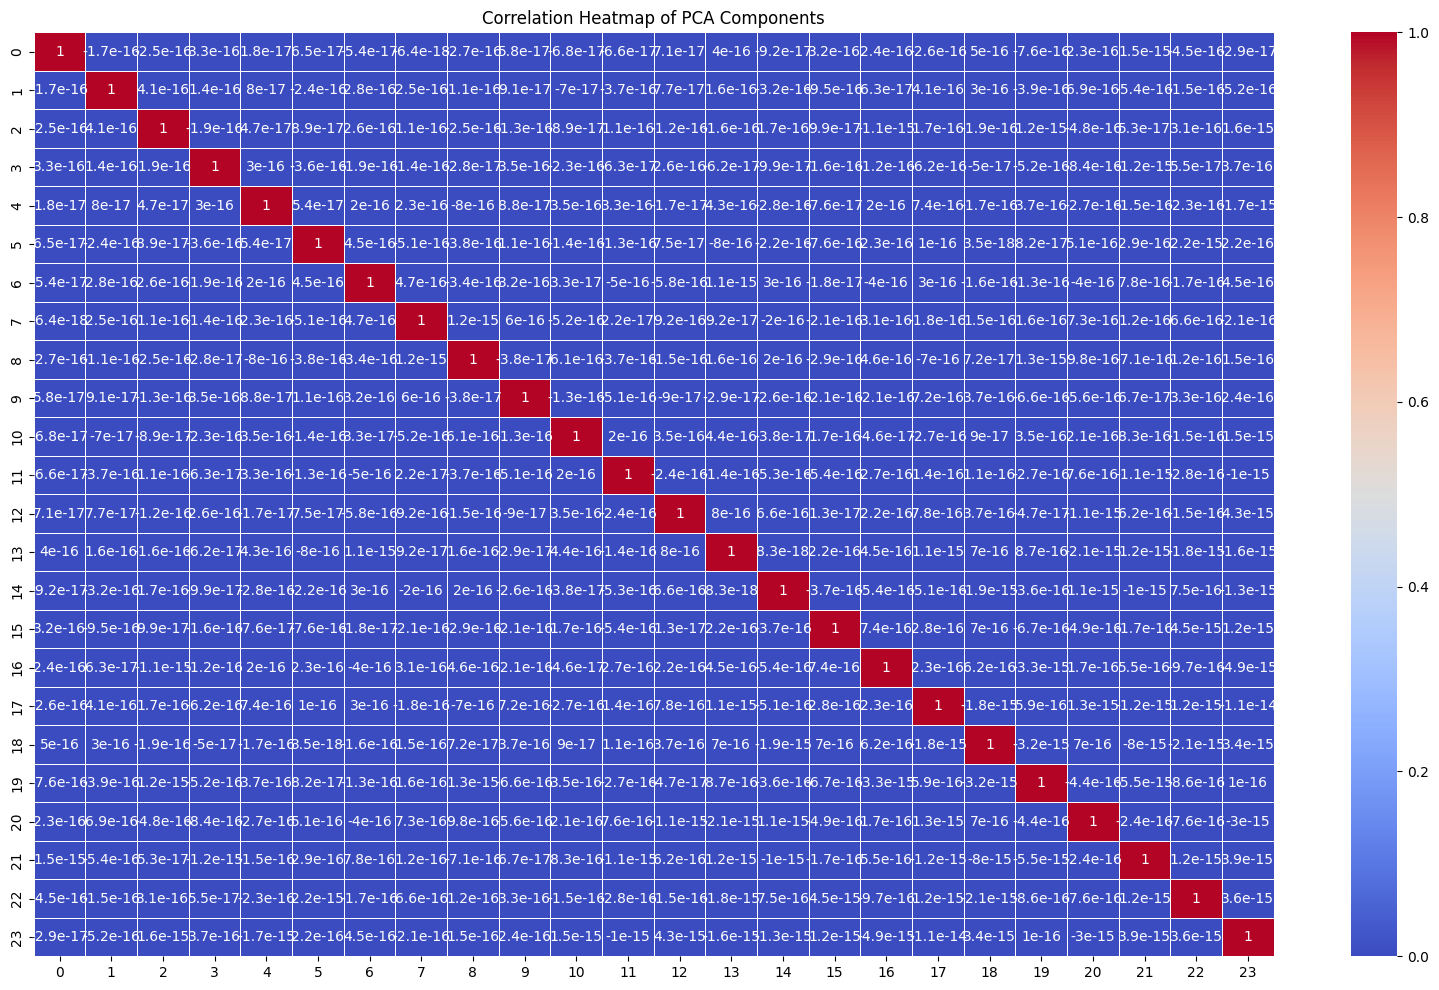

In [617]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the PCA-transformed NumPy array to a DataFrame
X_train_pca_df = pd.DataFrame(X_train_pca)
X_test_pca_df = pd.DataFrame(X_test_pca)

# Now you can compute the correlation matrix and plot the heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(X_train_pca_df.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap of PCA Components')
plt.show()



In [503]:
print(train_final_df.dtypes)

season                int64
holiday               int64
workingday            int64
weather               int64
temp_f              float64
humidity              int64
windspeed_r         float64
hour                  int32
day_of_week           int32
day_of_month          int32
sin_day_of_week     float64
cos_day_of_week     float64
sin_month           float64
cos_month           float64
sin_hour            float64
cos_hour            float64
period_of_day         int32
weekend               int32
holiday_weekend       int32
month                 int32
windchill           float64
dew_point           float64
casual_trend        float64
registered_trend    float64
log_casual          float64
log_registered      float64
conversion_ratio    float64
dtype: object


## Model Analysis
 
#### Since we are analyzing the Conversion Rate, a continuous data , regression models are the most appropriate choice. Regression models are designed to predict continuous outcomes, making them ideal for this scenario where we need to estimate the relationship between the conversion rate and potential predictor variables
#### The training data will be run through several Regression models to get the best fit model. Each model is evaluated and compared based on the following factors 
####  i) Mean Squared Error (MSE): Shows the average of sqaured differene between actual and preditcted values. It penalizes larger errors heavily so is a good measure
####   ii) R -squared:  Indicator of how much the proportion of variation can be explained by the model. It ranges from 0-1. Higher score is desirable

In [619]:
#importing necessary modules for Deploying models and Evaluating them
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, max_error
from sklearn.linear_model import  LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.neighbors import KNeighborsRegressor                                                                                                                                                                                                                                                #mahinisawesomemate
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor, RandomForestRegressor, VotingRegressor, StackingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.svm import SVR

In [620]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

# List of regression models to test
models = [
    ('Linear Regression', LinearRegression()),
    ('Ridge Regression', Ridge(alpha=1.0)),
    ('Lasso Regression', Lasso(alpha=0.01)),
    ('ElasticNet Regression', ElasticNet(alpha=0.01, l1_ratio=0.5)),
    ('Support Vector Regression', SVR(kernel='rbf')),
    ('Random Forest Regression', RandomForestRegressor(n_estimators=100)),
    ('CatBoost Regression', CatBoostRegressor(silent = True)),
    ('GradientBoost Regression', GradientBoostingRegressor())
]

# Assuming X_train, X_test, y_train, y_test are already defined
n = len(X_test_pca_df)  # Number of samples
p = X_train_pca_df.shape[1]  # Number of predictors (features)

# Initialize a list to store results
results = []

# Iterate over the models
for name, model in models:
    # Fit the model
    model.fit(X_train_pca_df, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_pca_df )
    
    # Evaluate the model
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    # Calculate Adjusted R²
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    
    results.append([name, rmse, r2, adjusted_r2])

results_df = pd.DataFrame(results, columns=['Model', 'RMSE', 'R²', 'Adjusted R²'])

# Display the results in tabular format
print(results_df)


                       Model      RMSE        R²  Adjusted R²
0          Linear Regression  0.055010  0.871997     0.871106
1           Ridge Regression  0.055013  0.871983     0.871093
2           Lasso Regression  0.081944  0.715964     0.713989
3      ElasticNet Regression  0.067091  0.809601     0.808277
4  Support Vector Regression  0.046119  0.910030     0.909404
5   Random Forest Regression  0.030287  0.961198     0.960928
6        CatBoost Regression  0.017943  0.986381     0.986287
7   GradientBoost Regression  0.035698  0.946096     0.945721


In [ ]:
X_train_pca_df

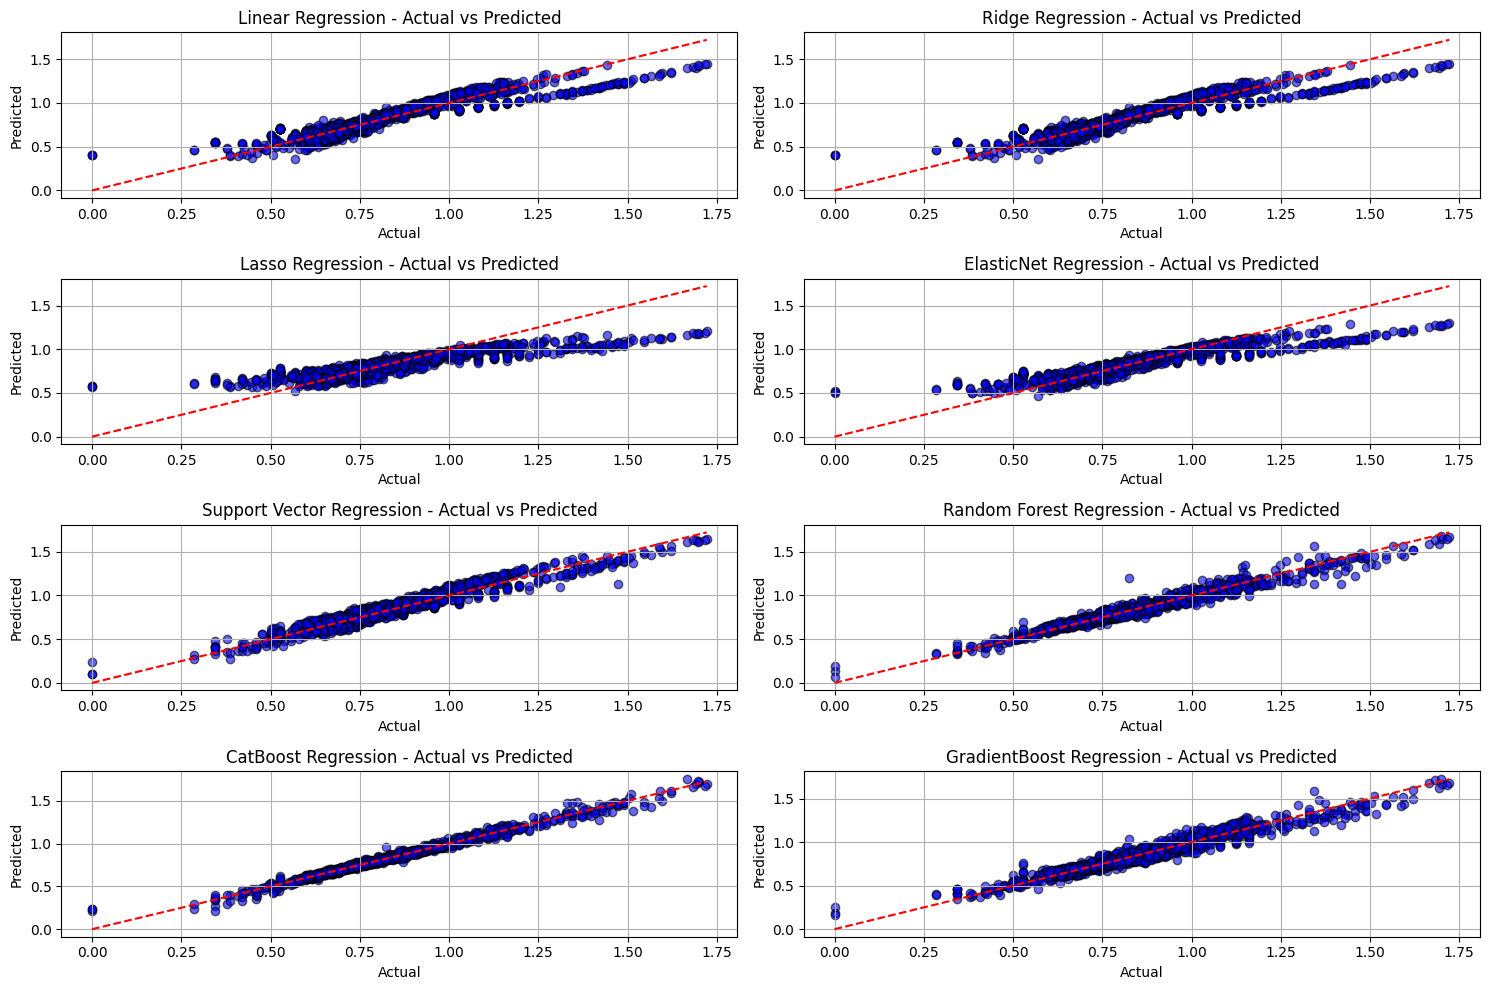

In [621]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# List of regression models to test
models = [
    ('Linear Regression', LinearRegression()),
    ('Ridge Regression', Ridge(alpha=1.0)),
    ('Lasso Regression', Lasso(alpha=0.01)),
    ('ElasticNet Regression', ElasticNet(alpha=0.01, l1_ratio=0.5)),
    ('Support Vector Regression', SVR(kernel='rbf')),
    ('Random Forest Regression', RandomForestRegressor(n_estimators=100)),
    ('CatBoost Regression', CatBoostRegressor(silent = True)),
    ('GradientBoost Regression', GradientBoostingRegressor())
]

# Assuming X_train, X_test, y_train, y_test are already defined

# Initialize a figure for subplots
plt.figure(figsize=(15, 10))

# Iterate over the models
for i, (name, model) in enumerate(models):
    # Fit the model
    model.fit(X_train_pca_df, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_pca_df)
    
    # Plot actual vs predicted values
    plt.subplot(4, 2, i+1)  # Creating 3 rows and 2 columns of subplots
    plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.6)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Line for perfect predictions
    plt.title(f'{name} - Actual vs Predicted')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.grid(True)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


# Model Selection
#### CatBoost Model Performance Analysis:
#### Upon comparing the Root Mean Squared Error (RMSE) and R-squared (R²) values across multiple models, the CatBoost model demonstrates the best performance with the following metrics:

#### RMSE: 0.017943 (lower is better)
#### R²: 0.986381 (closer to 1 is better)
#### The CatBoost model has the lowest RMSE and the highest R² values, indicating that it not only predicts the data with high accuracy but also explains a large proportion of the variance in the target variable (Registered to Casual Conversion Rate). These metrics confirm that the model has captured the underlying patterns in the data effectively, with minimal error in its predictions.


# Conclusion
#### Given the strong performance of the CatBoost model, it can serve as a highly reliable predictive tool for estimating the Registered to Casual Conversion Rate. This insight will allow the business to focus its strategies and efforts more effectively by targeting the key factors that influence this conversion rate. By predicting conversion trends accurately, the business can:

#### Optimize marketing efforts by focusing on casual users who are more likely to convert to registered users.
#### Allocate resources more efficiently by identifying seasonal trends or user behaviours that drive higher conversions.
#### Drive impactful outcomes by making data-driven decisions to enhance user retention and engagement strategies.

#### In conclusion, the CatBoost model’s predictive power will empower the business to fine-tune its focus on the Registered to Casual Conversion Rate, potentially leading to improved revenue and customer satisfaction.